In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import numpy as np
from helper import p_values, p_values_ras, p_values_wilcoxon, p_values_ras_wilcoxon

In [2]:
true_to_seires = pd.read_csv('../output/inv_y_rnn.csv', index_col=0)
print(true_to_seires.shape)

true_to_seires = true_to_seires.iloc[-17521:, :]
print(true_to_seires.shape)

(19249, 96)
(17521, 96)


In [3]:
# sum(true_to_seires.values - true_to_seires2.values)

In [4]:
mlp_raw = pd.read_csv('../output/inv_yhat_mlp.csv', index_col=0)
rnn_raw = pd.read_csv('../output/inv_yhat_rnn.csv', index_col=0)
lstm_raw = pd.read_csv('../output/inv_yhat_lstm.csv', index_col=0)
conv_mlp_raw = pd.read_csv('../output/inv_yhat_cnn.csv', index_col=0)
conv_rnn_raw = pd.read_csv('../output/inv_yhat_rcnn.csv', index_col=0)

In [5]:
print(mlp_raw.shape, rnn_raw.shape, lstm_raw.shape, conv_mlp_raw.shape, conv_rnn_raw.shape)

(19249, 96) (19249, 96) (19249, 96) (19249, 96) (19249, 96)


In [6]:
mlp = mlp_raw.iloc[-17521:, :]
rnn = rnn_raw.iloc[-17521:, :]
lstm = lstm_raw.iloc[-17521:, :]
conv_mlp = conv_mlp_raw.iloc[-17521:, :]
conv_rnn = conv_rnn_raw.iloc[-17521:, :]

In [7]:
print(mlp.shape)
print(rnn.shape)
print(lstm.shape)
print(conv_mlp.shape)
print(conv_rnn.shape)

(17521, 96)
(17521, 96)
(17521, 96)
(17521, 96)
(17521, 96)


In [8]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

## Visuallization

### Normal day: April 1, 2019

In [9]:
hecras = pd.read_csv('../data/ras_1920.csv')
hecras

,Time,S1 OBS,T1 RAS,T2 RAS S1,S25A_TW OBS,T2 RAS S25A,S25B_TW OBS,T2 RAS S25B,S26_TW OBS,RAS S26
0,2019-01-01 00:00:00,-0.32,-0.37,-0.54,-0.31,-0.54,-0.28,-0.53,-0.30,-0.54
1,2019-01-01 01:00:00,0.17,0.13,-0.05,0.14,-0.05,0.19,-0.05,0.19,-0.05
2,2019-01-01 02:00:00,0.80,0.67,0.62,0.76,0.61,0.83,0.63,0.80,0.63
3,2019-01-01 03:00:00,1.26,1.18,1.09,1.27,1.10,1.31,1.10,1.28,1.08
4,2019-01-01 04:00:00,1.68,1.53,1.51,1.67,1.53,1.70,1.51,1.69,1.52
...,...,...,...,...,...,...,...,...,...,...
17514,2020-12-30 18:00:00,1.14,1.16,1.13,1.18,1.14,1.17,1.13,1.25,1.14
17515,2020-12-30 19:00:00,1.62,1.49,1.67,1.65,1.67,1.70,1.69,1.67,1.67
17516,2020-12-30 20:00:00,1.93,1.94,1.94,1.95,1.93,2.00,1.95,2.00,1.91
17517,2020-12-30 21:00:00,2.19,2.12,2.08,2.21,2.07,2.25,2.10,2.25,2.13


In [10]:
ras = hecras[['T2 RAS S1','T2 RAS S25A', 'T2 RAS S25B', 'RAS S26']]
obs = hecras[['S1 OBS', 'S25A_TW OBS' , 'S25B_TW OBS', 'S26_TW OBS']]

In [11]:
mlp_1920 = mlp.iloc[-17521:-2, :]
rnn_1920 = rnn.iloc[-17521:-2, :]
lstm_1920 = lstm.iloc[-17521:-2, :]
conv_mlp_1920 = conv_mlp.iloc[-17521:-2, :]
conv_rnn_1920 = conv_rnn.iloc[-17521:-2, :]

In [12]:
mlp_1920_1d = mlp_1920.iloc[2160, :].values
rnn_1920_1d = rnn_1920.iloc[2160, :].values
lstm_1920_1d = lstm_1920.iloc[2160, :].values
conv_mlp_1920_1d = conv_mlp_1920.iloc[2160, :].values
conv_rnn_1920_1d = conv_rnn_1920.iloc[2160, :].values
ras_1d = ras.iloc[2160:2184, :]
obs_1d = obs.iloc[2160:2184, :]

In [13]:
mlp_1920_1d_r = np.reshape(mlp_1920_1d, (-1,4))
rnn_1920_1d_r = np.reshape(rnn_1920_1d, (-1,4))
lstm_1920_1d_r = np.reshape(lstm_1920_1d, (-1,4))
conv_mlp_1920_1d_r = np.reshape(conv_mlp_1920_1d , (-1,4))
conv_rnn_1920_1d_r = np.reshape(conv_rnn_1920_1d, (-1,4))

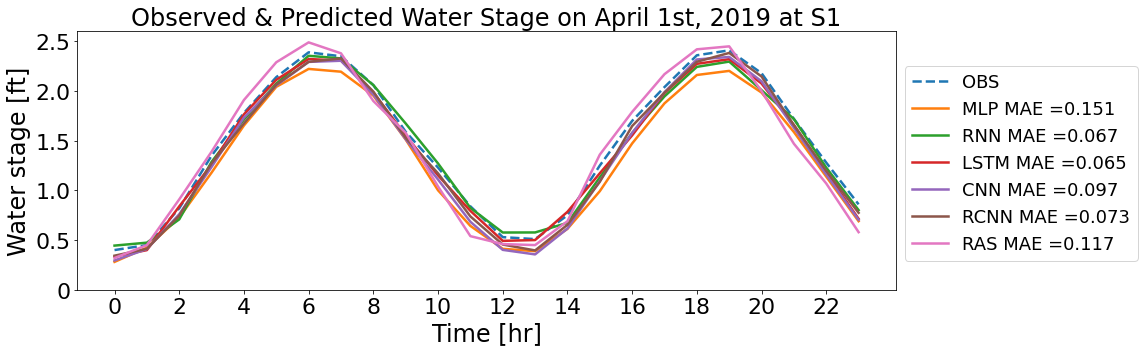

In [14]:
df_p = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
df_p.iloc[:, 0] = obs_1d.iloc[:, 0]
df_p.iloc[:, 1] = mlp_1920_1d_r[:, 0]
df_p.iloc[:, 2] = rnn_1920_1d_r[:, 0]
df_p.iloc[:, 3] = lstm_1920_1d_r[:, 0]
df_p.iloc[:, 4] = conv_mlp_1920_1d_r[:, 0]
df_p.iloc[:, 5] = conv_rnn_1920_1d_r[:, 0]
df_p.iloc[:, 6] = ras_1d.iloc[:, 0]

plt.rcParams["figure.figsize"] = (16, 5)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"

LINEWIDTH = 2.5
plt.plot(df_p.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_p.iloc[:, 1].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 1])))))
plt.plot(df_p.iloc[:, 2].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 2])))))
plt.plot(df_p.iloc[:, 3].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 3])))))
plt.plot(df_p.iloc[:, 4].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 4])))))
plt.plot(df_p.iloc[:, 5].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 5])))))
plt.plot(df_p.iloc[:, 6].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=24)
plt.ylabel('Water stage [ft]', fontsize=24)
plt.xticks(np.arange(0, 24, step=2), [i for i in range(0, 24, 2)], fontsize=22)
plt.yticks(np.arange(0, 3, step=0.5), [0, 0.5, 1.0, 1.5, 2.0, 2.5], fontsize=22)
plt.title('Observed & Predicted Water Stage on April 1st, 2019 at S1', fontsize=24)
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
plt.savefig('../figures/7-1.png', bbox_inches='tight', dpi=400)
plt.show()

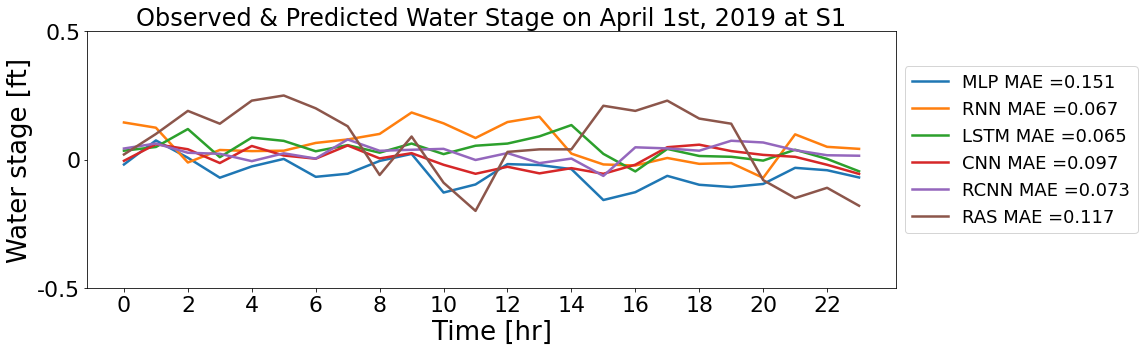

In [15]:
df_p = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
df_p.iloc[:, 0] = obs_1d.iloc[:, 0]
df_p.iloc[:, 1] = mlp_1920_1d_r[:, 0]
df_p.iloc[:, 2] = rnn_1920_1d_r[:, 0]
df_p.iloc[:, 3] = lstm_1920_1d_r[:, 0]
df_p.iloc[:, 4] = conv_mlp_1920_1d_r[:, 0]
df_p.iloc[:, 5] = conv_rnn_1920_1d_r[:, 0]
df_p.iloc[:, 6] = ras_1d.iloc[:, 0]

plt.rcParams["figure.figsize"] = (16, 5)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"

LINEWIDTH = 2.5
# plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_p.iloc[:, 1].values-df_p.iloc[:, 0].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 1])))))
plt.plot(df_p.iloc[:, 2].values-df_p.iloc[:, 0].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 2])))))
plt.plot(df_p.iloc[:, 3].values-df_p.iloc[:, 0].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 3])))))
plt.plot(df_p.iloc[:, 4].values-df_p.iloc[:, 0].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 4])))))
plt.plot(df_p.iloc[:, 5].values-df_p.iloc[:, 0].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 5])))))
plt.plot(df_p.iloc[:, 6].values-df_p.iloc[:, 0].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_p.iloc[:, 0], df_p.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 24, step=2), [i for i in range(0, 24, 2)], fontsize=22)
plt.yticks(np.arange(-0.6, 0.6, step=0.5), [-0.5, 0, 0.5], fontsize=22)
plt.title('Observed & Predicted Water Stage on April 1st, 2019 at S1', fontsize=24)
# plt.ylim(-1.5, 1.5)
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
plt.savefig('../figures/7-1-error.png', bbox_inches='tight', dpi=300)
plt.show()

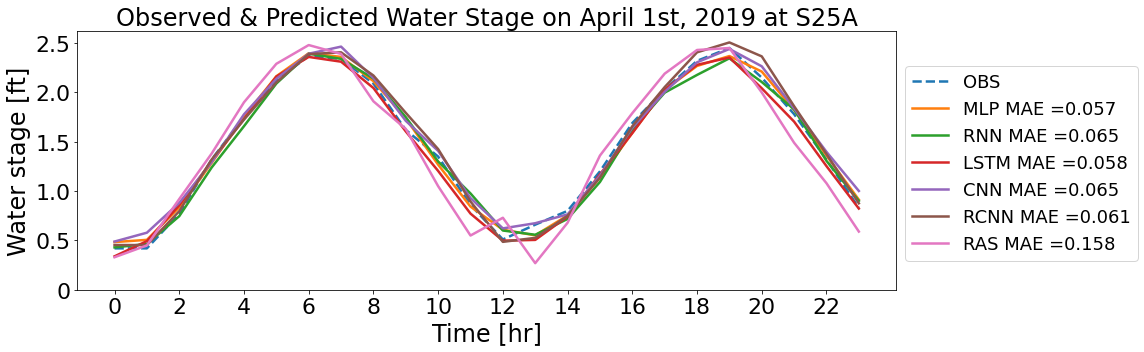

In [40]:
df_p1 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
df_p1.iloc[:, 0] = obs_1d.iloc[:, 1]
df_p1.iloc[:, 1] = mlp_1920_1d_r[:, 1]
df_p1.iloc[:, 2] = rnn_1920_1d_r[:, 1]
df_p1.iloc[:, 3] = lstm_1920_1d_r[:, 1]
df_p1.iloc[:, 4] = conv_mlp_1920_1d_r[:, 1]
df_p1.iloc[:, 5] = conv_rnn_1920_1d_r[:, 1]
df_p1.iloc[:, 6] = ras_1d.iloc[:, 1]

plt.rcParams["figure.figsize"] = (16, 5)

LINEWIDTH = 2.5
plt.plot(df_p1.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_p1.iloc[:, 1].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 1])))))
plt.plot(df_p1.iloc[:, 2].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 2])))))
plt.plot(df_p1.iloc[:, 3].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 3])))))
plt.plot(df_p1.iloc[:, 4].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 4])))))
plt.plot(df_p1.iloc[:, 5].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 5])))))
plt.plot(df_p1.iloc[:, 6].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=24)
plt.ylabel('Water stage [ft]', fontsize=24)
plt.xticks(np.arange(0, 24, step=2), [i for i in range(0, 24, 2)], fontsize=22)
plt.yticks(np.arange(0, 3, step=0.5), [0, 0.5, 1.0, 1.5, 2.0, 2.5], fontsize=22)
plt.title('Observed & Predicted Water Stage on April 1st, 2019 at S25A', fontsize=24)
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/7-2.png', bbox_inches='tight', dpi=400)
plt.show()

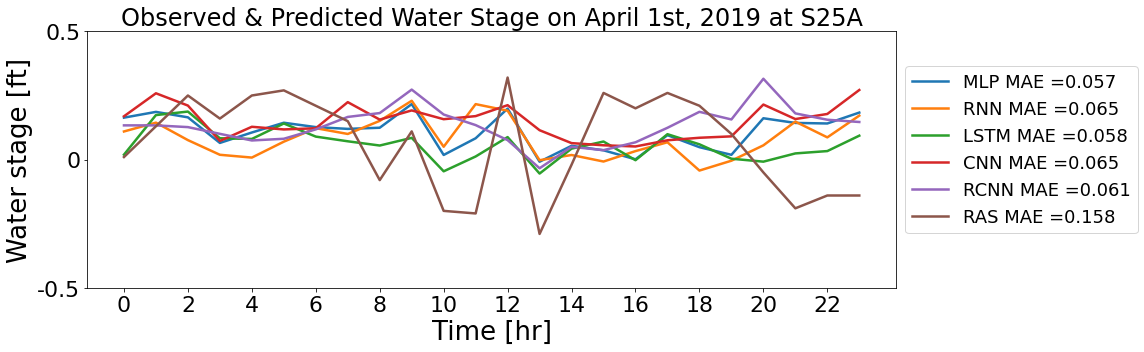

In [47]:
df_p1 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
df_p1.iloc[:, 0] = obs_1d.iloc[:, 1]
df_p1.iloc[:, 1] = mlp_1920_1d_r[:, 1]
df_p1.iloc[:, 2] = rnn_1920_1d_r[:, 1]
df_p1.iloc[:, 3] = lstm_1920_1d_r[:, 1]
df_p1.iloc[:, 4] = conv_mlp_1920_1d_r[:, 1]
df_p1.iloc[:, 5] = conv_rnn_1920_1d_r[:, 1]
df_p1.iloc[:, 6] = ras_1d.iloc[:, 1]

plt.rcParams["figure.figsize"] = (16, 5)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"

LINEWIDTH = 2.5
# plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_p1.iloc[:, 1].values-df_p1.iloc[:, 0].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 1])))))
plt.plot(df_p1.iloc[:, 2].values-df_p1.iloc[:, 0].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 2])))))
plt.plot(df_p1.iloc[:, 3].values-df_p1.iloc[:, 0].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 3])))))
plt.plot(df_p1.iloc[:, 4].values-df_p1.iloc[:, 0].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 4])))))
plt.plot(df_p1.iloc[:, 5].values-df_p1.iloc[:, 0].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 5])))))
plt.plot(df_p1.iloc[:, 6].values-df_p1.iloc[:, 0].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_p1.iloc[:, 0], df_p1.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 24, step=2), [i for i in range(0, 24, 2)], fontsize=22)
plt.yticks(np.arange(-0.6, 0.6, step=0.5), [-0.5, 0, 0.5], fontsize=22)
plt.title('Observed & Predicted Water Stage on April 1st, 2019 at S25A', fontsize=24)
# plt.ylim(-1.5, 1.5)
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-1-diff.png', bbox_inches='tight', dpi=300)
plt.show()

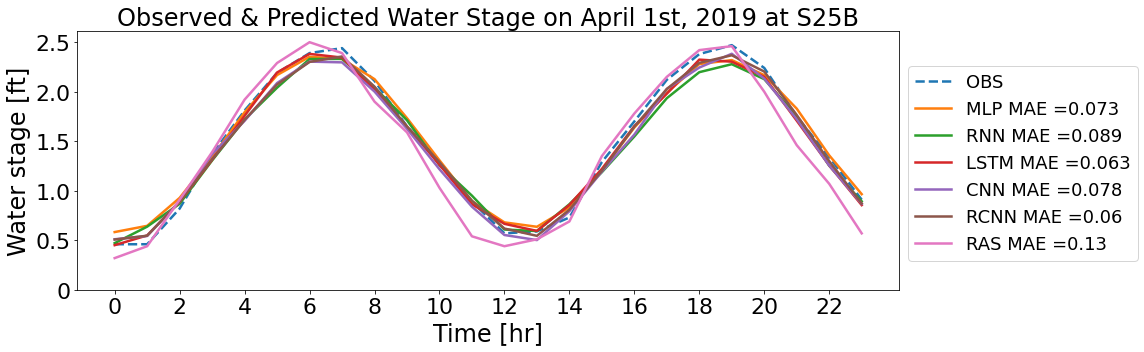

In [48]:
df_p2 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
df_p2.iloc[:, 0] = obs_1d.iloc[:, 2]
df_p2.iloc[:, 1] = mlp_1920_1d_r[:, 2]
df_p2.iloc[:, 2] = rnn_1920_1d_r[:, 2]
df_p2.iloc[:, 3] = lstm_1920_1d_r[:, 2]
df_p2.iloc[:, 4] = conv_mlp_1920_1d_r[:, 2]
df_p2.iloc[:, 5] = conv_rnn_1920_1d_r[:, 2]
df_p2.iloc[:, 6] = ras_1d.iloc[:, 2]


plt.rcParams["figure.figsize"] = (16, 5)

LINEWIDTH = 2.5
plt.plot(df_p2.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_p2.iloc[:, 1].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 1])))))
plt.plot(df_p2.iloc[:, 2].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 2])))))
plt.plot(df_p2.iloc[:, 3].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 3])))))
plt.plot(df_p2.iloc[:, 4].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 4])))))
plt.plot(df_p2.iloc[:, 5].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 5])))))
plt.plot(df_p2.iloc[:, 6].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=24)
plt.ylabel('Water stage [ft]', fontsize=24)
plt.xticks(np.arange(0, 24, step=2), [i for i in range(0, 24, 2)], fontsize=22)
plt.yticks(np.arange(0, 3, step=0.5), [0, 0.5, 1.0, 1.5, 2.0, 2.5], fontsize=22)
plt.title('Observed & Predicted Water Stage on April 1st, 2019 at S25B', fontsize=24)
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/7-3.png', bbox_inches='tight', dpi=400)
plt.show()

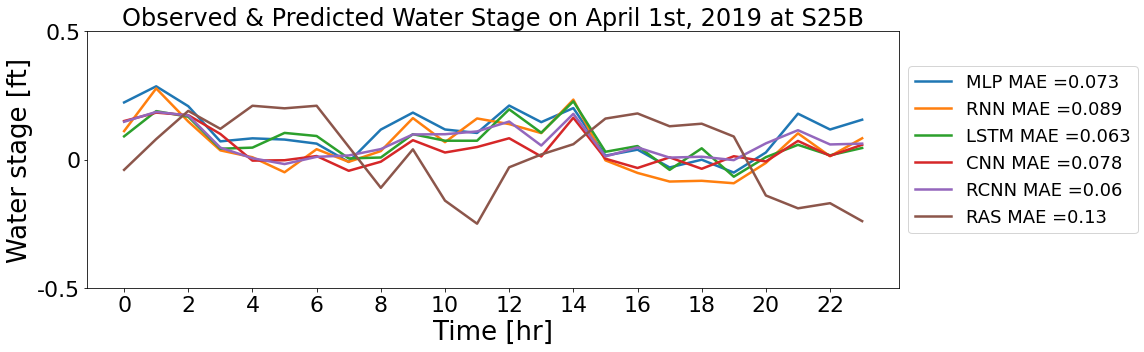

In [49]:
df_p2 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
df_p2.iloc[:, 0] = obs_1d.iloc[:, 2]
df_p2.iloc[:, 1] = mlp_1920_1d_r[:, 2]
df_p2.iloc[:, 2] = rnn_1920_1d_r[:, 2]
df_p2.iloc[:, 3] = lstm_1920_1d_r[:, 2]
df_p2.iloc[:, 4] = conv_mlp_1920_1d_r[:, 2]
df_p2.iloc[:, 5] = conv_rnn_1920_1d_r[:, 2]
df_p2.iloc[:, 6] = ras_1d.iloc[:, 2]

plt.rcParams["figure.figsize"] = (16, 5)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"

LINEWIDTH = 2.5
# plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_p2.iloc[:, 1].values-df_p2.iloc[:, 0].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 1])))))
plt.plot(df_p2.iloc[:, 2].values-df_p2.iloc[:, 0].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 2])))))
plt.plot(df_p2.iloc[:, 3].values-df_p2.iloc[:, 0].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 3])))))
plt.plot(df_p2.iloc[:, 4].values-df_p2.iloc[:, 0].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 4])))))
plt.plot(df_p2.iloc[:, 5].values-df_p2.iloc[:, 0].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 5])))))
plt.plot(df_p2.iloc[:, 6].values-df_p2.iloc[:, 0].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_p2.iloc[:, 0], df_p2.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 24, step=2), [i for i in range(0, 24, 2)], fontsize=22)
plt.yticks(np.arange(-0.6, 0.6, step=0.5), [-0.5, 0, 0.5], fontsize=22)
plt.title('Observed & Predicted Water Stage on April 1st, 2019 at S25B', fontsize=24)
# plt.ylim(-1.5, 1.5)
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-1-diff.png', bbox_inches='tight', dpi=300)
plt.show()

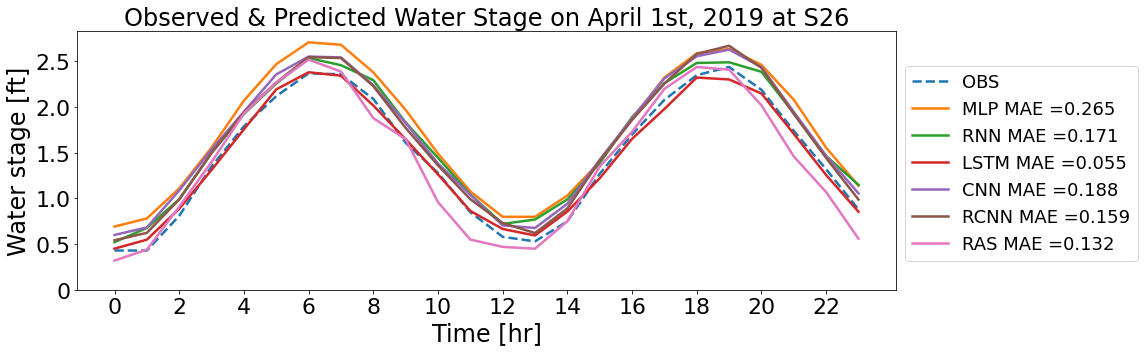

In [45]:
df_p3 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
df_p3.iloc[:, 0] = obs_1d.iloc[:, 3]
df_p3.iloc[:, 1] = mlp_1920_1d_r[:, 3]
df_p3.iloc[:, 2] = rnn_1920_1d_r[:, 3]
df_p3.iloc[:, 3] = lstm_1920_1d_r[:, 2]
df_p3.iloc[:, 4] = conv_mlp_1920_1d_r[:, 3]
df_p3.iloc[:, 5] = conv_rnn_1920_1d_r[:, 3]
df_p3.iloc[:, 6] = ras_1d.iloc[:, 3]


plt.rcParams["figure.figsize"] = (16, 5)

LINEWIDTH = 2.5
plt.plot(df_p3.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_p3.iloc[:, 1].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 1])))))
plt.plot(df_p3.iloc[:, 2].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 2])))))
plt.plot(df_p3.iloc[:, 3].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 3])))))
plt.plot(df_p3.iloc[:, 4].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 4])))))
plt.plot(df_p3.iloc[:, 5].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 5])))))
plt.plot(df_p3.iloc[:, 6].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=24)
plt.ylabel('Water stage [ft]', fontsize=24)
plt.xticks(np.arange(0, 24, step=2), [i for i in range(0, 24, 2)], fontsize=22)
plt.yticks(np.arange(0, 3, step=0.5), [0, 0.5, 1.0, 1.5, 2.0, 2.5], fontsize=22)
plt.title('Observed & Predicted Water Stage on April 1st, 2019 at S26', fontsize=24)
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/7-4.png', bbox_inches='tight', dpi=400)
plt.show()

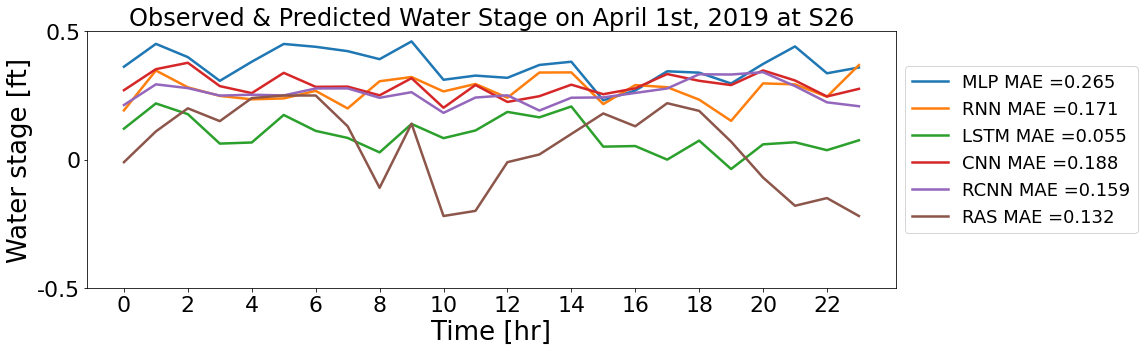

In [50]:
df_p3 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
df_p3.iloc[:, 0] = obs_1d.iloc[:, 3]
df_p3.iloc[:, 1] = mlp_1920_1d_r[:, 3]
df_p3.iloc[:, 2] = rnn_1920_1d_r[:, 3]
df_p3.iloc[:, 3] = lstm_1920_1d_r[:, 2]
df_p3.iloc[:, 4] = conv_mlp_1920_1d_r[:, 3]
df_p3.iloc[:, 5] = conv_rnn_1920_1d_r[:, 3]
df_p3.iloc[:, 6] = ras_1d.iloc[:, 3]

plt.rcParams["figure.figsize"] = (16, 5)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"

LINEWIDTH = 2.5
# plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_p3.iloc[:, 1].values-df_p3.iloc[:, 0].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 1])))))
plt.plot(df_p3.iloc[:, 2].values-df_p3.iloc[:, 0].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 2])))))
plt.plot(df_p3.iloc[:, 3].values-df_p3.iloc[:, 0].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 3])))))
plt.plot(df_p3.iloc[:, 4].values-df_p3.iloc[:, 0].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 4])))))
plt.plot(df_p3.iloc[:, 5].values-df_p3.iloc[:, 0].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 5])))))
plt.plot(df_p3.iloc[:, 6].values-df_p3.iloc[:, 0].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_p3.iloc[:, 0], df_p3.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 24, step=2), [i for i in range(0, 24, 2)], fontsize=22)
plt.yticks(np.arange(-0.6, 0.6, step=0.5), [-0.5, 0, 0.5], fontsize=22)
plt.title('Observed & Predicted Water Stage on April 1st, 2019 at S26', fontsize=24)
# plt.ylim(-1.5, 1.5)
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-1-diff.png', bbox_inches='tight', dpi=300)
plt.show()

### Rain days ( high rainfall intensity): Agu 1-3, 2020

In [18]:
mlp_1920_h = mlp_1920.iloc[13849:13921, 92:96].values
rnn_1920_h = rnn_1920.iloc[13849:13921, 92:96].values
lstm_1920_h = lstm_1920.iloc[13849:13921, 92:96].values
conv_mlp_1920_h = conv_mlp_1920.iloc[13849:13921, 92:96].values
conv_rnn_1920_h = conv_rnn_1920.iloc[13849:13921, 92:96].values
ras_h = ras.iloc[13872:13944, :]
obs_h = obs.iloc[13872:13944, :]

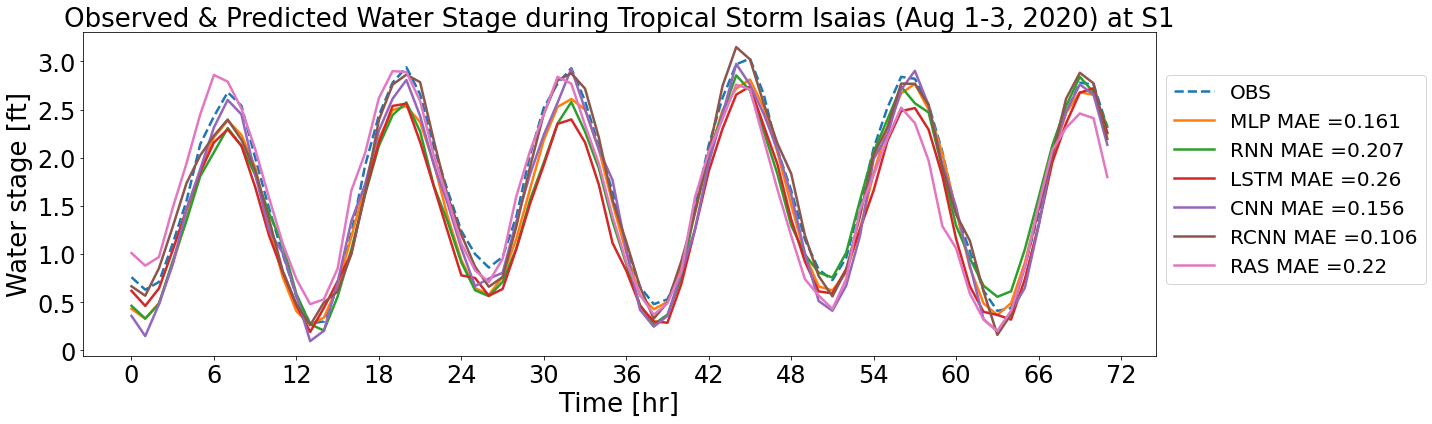

In [19]:
df_h = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'Conv_MLP', 'Conv_RNN', 'RAS'])
df_h.iloc[:, 0] = obs_h.iloc[:, 0]
df_h.iloc[:, 1] = mlp_1920_h[:, 0]
df_h.iloc[:, 2] = rnn_1920_h[:, 0]
df_h.iloc[:, 3] = lstm_1920_h[:, 0]
df_h.iloc[:, 4] = conv_mlp_1920_h[:, 0]
df_h.iloc[:, 5] = conv_rnn_1920_h[:, 0]
df_h.iloc[:, 6] = ras_h.iloc[:, 0]

plt.rcParams["figure.figsize"] = (20, 6)

LINEWIDTH = 2.5
plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_h.iloc[:, 1].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 1])))))
plt.plot(df_h.iloc[:, 2].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 2])))))
plt.plot(df_h.iloc[:, 3].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 3])))))
plt.plot(df_h.iloc[:, 4].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 4])))))
plt.plot(df_h.iloc[:, 5].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 5])))))
plt.plot(df_h.iloc[:, 6].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 73, step=6), [i for i in range(0, 73, 6)], fontsize=24)
plt.yticks(np.arange(0, 3.5, step=0.5), [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], fontsize=24)
plt.title('Observed & Predicted Water Stage during Tropical Storm Isaias (Aug 1-3, 2020) at S1', fontsize=26)
plt.legend(fontsize=20, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-1.png', bbox_inches='tight', dpi=400)
plt.show()

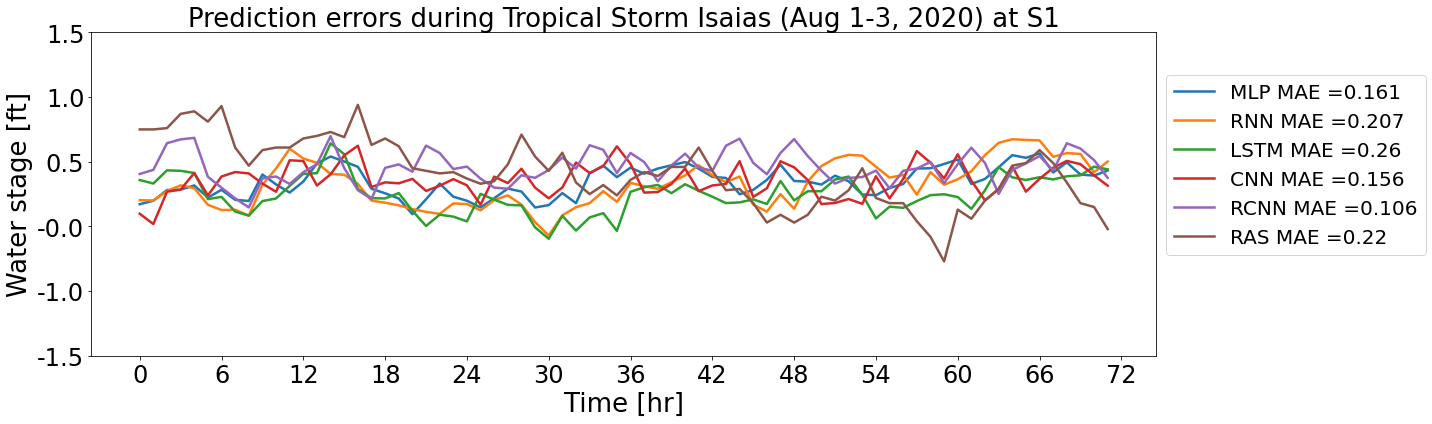

In [20]:
df_h = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'Conv_MLP', 'Conv_RNN', 'RAS'])
df_h.iloc[:, 0] = obs_h.iloc[:, 0]
df_h.iloc[:, 1] = mlp_1920_h[:, 0]
df_h.iloc[:, 2] = rnn_1920_h[:, 0]
df_h.iloc[:, 3] = lstm_1920_h[:, 0]
df_h.iloc[:, 4] = conv_mlp_1920_h[:, 0]
df_h.iloc[:, 5] = conv_rnn_1920_h[:, 0]
df_h.iloc[:, 6] = ras_h.iloc[:, 0]

plt.rcParams["figure.figsize"] = (20, 6)

LINEWIDTH = 2.5
# plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_h.iloc[:, 1].values-df_h.iloc[:, 0].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 1])))))
plt.plot(df_h.iloc[:, 2].values-df_h.iloc[:, 0].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 2])))))
plt.plot(df_h.iloc[:, 3].values-df_h.iloc[:, 0].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 3])))))
plt.plot(df_h.iloc[:, 4].values-df_h.iloc[:, 0].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 4])))))
plt.plot(df_h.iloc[:, 5].values-df_h.iloc[:, 0].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 5])))))
plt.plot(df_h.iloc[:, 6].values-df_h.iloc[:, 0].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_h.iloc[:, 0], df_h.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 73, step=6), [i for i in range(0, 73, 6)], fontsize=24)
plt.yticks(np.arange(-1.5, 1.5, step=0.5), [-1.5, -1.0, -0.0, 0.5, 1.0, 1.5], fontsize=24)
plt.title('Prediction errors during Tropical Storm Isaias (Aug 1-3, 2020) at S1', fontsize=26)
# plt.ylim(-1.5, 1.5)
plt.legend(fontsize=20, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-1-diff.png', bbox_inches='tight', dpi=300)
plt.show()

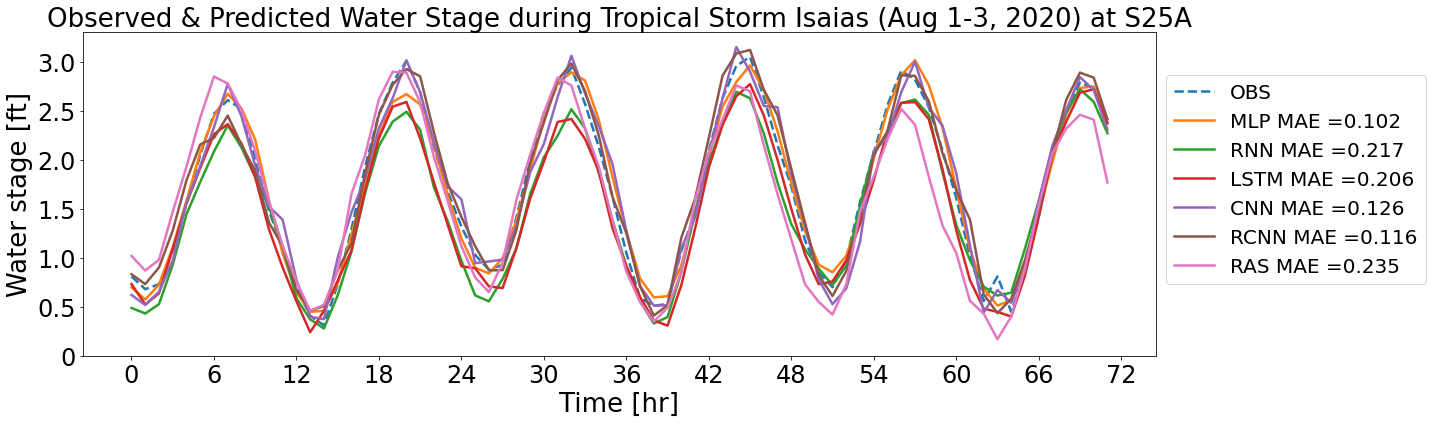

In [21]:
df_h1 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'Conv_MLP', 'Conv_RNN', 'RAS'])
df_h1.iloc[:, 0] = obs_h.iloc[:, 1]
df_h1.iloc[:, 1] = mlp_1920_h[:, 1]
df_h1.iloc[:, 2] = rnn_1920_h[:, 1]
df_h1.iloc[:, 3] = lstm_1920_h[:, 1]
df_h1.iloc[:, 4] = conv_mlp_1920_h[:, 1]
df_h1.iloc[:, 5] = conv_rnn_1920_h[:, 1]
df_h1.iloc[:, 6] = ras_h.iloc[:, 1]

plt.rcParams["figure.figsize"] = (20, 6)

LINEWIDTH = 2.5
plt.plot(df_h1.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_h1.iloc[:, 1].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 1])))))
plt.plot(df_h1.iloc[:, 2].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 2])))))
plt.plot(df_h1.iloc[:, 3].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 3])))))
plt.plot(df_h1.iloc[:, 4].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 4])))))
plt.plot(df_h1.iloc[:, 5].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 5])))))
plt.plot(df_h1.iloc[:, 6].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 73, step=6), [i for i in range(0, 73, 6)], fontsize=24)
plt.yticks(np.arange(0, 3.5, step=0.5), [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], fontsize=24)
plt.title('Observed & Predicted Water Stage during Tropical Storm Isaias (Aug 1-3, 2020) at S25A', fontsize=26)
plt.legend(fontsize=20, bbox_to_anchor=(1.0, 0.9))
# plt.grid()

# plt.savefig('../figures/9-2.png', bbox_inches='tight', dpi=400)
plt.show()

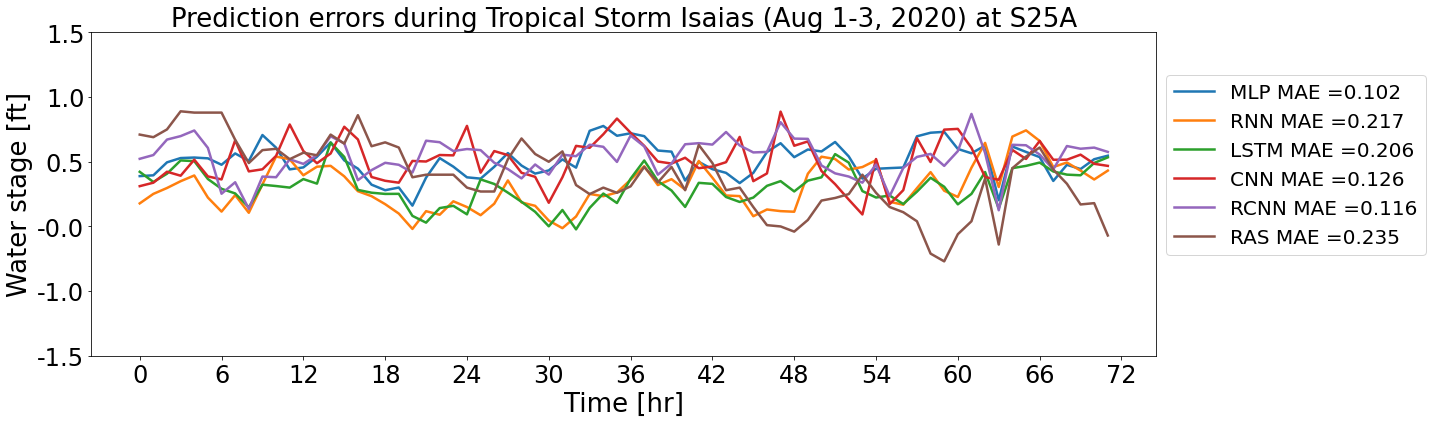

In [22]:
df_h1 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'Conv_MLP', 'Conv_RNN', 'RAS'])
df_h1.iloc[:, 0] = obs_h.iloc[:, 1]
df_h1.iloc[:, 1] = mlp_1920_h[:, 1]
df_h1.iloc[:, 2] = rnn_1920_h[:, 1]
df_h1.iloc[:, 3] = lstm_1920_h[:, 1]
df_h1.iloc[:, 4] = conv_mlp_1920_h[:, 1]
df_h1.iloc[:, 5] = conv_rnn_1920_h[:, 1]
df_h1.iloc[:, 6] = ras_h.iloc[:, 1]

plt.rcParams["figure.figsize"] = (20, 6)

LINEWIDTH = 2.5
# plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_h1.iloc[:, 1].values-df_h1.iloc[:, 0].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 1])))))
plt.plot(df_h1.iloc[:, 2].values-df_h1.iloc[:, 0].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 2])))))
plt.plot(df_h1.iloc[:, 3].values-df_h1.iloc[:, 0].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 3])))))
plt.plot(df_h1.iloc[:, 4].values-df_h1.iloc[:, 0].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 4])))))
plt.plot(df_h1.iloc[:, 5].values-df_h1.iloc[:, 0].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 5])))))
plt.plot(df_h1.iloc[:, 6].values-df_h1.iloc[:, 0].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_h1.iloc[:, 0], df_h1.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 73, step=6), [i for i in range(0, 73, 6)], fontsize=24)
plt.yticks(np.arange(-1.5, 1.5, step=0.5), [-1.5, -1.0, -0.0, 0.5, 1.0, 1.5], fontsize=24)
plt.title('Prediction errors during Tropical Storm Isaias (Aug 1-3, 2020) at S25A', fontsize=26)
# plt.ylim(-1.5, 1.5)
plt.legend(fontsize=20, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-2-diff.png', bbox_inches='tight', dpi=300)
plt.show()

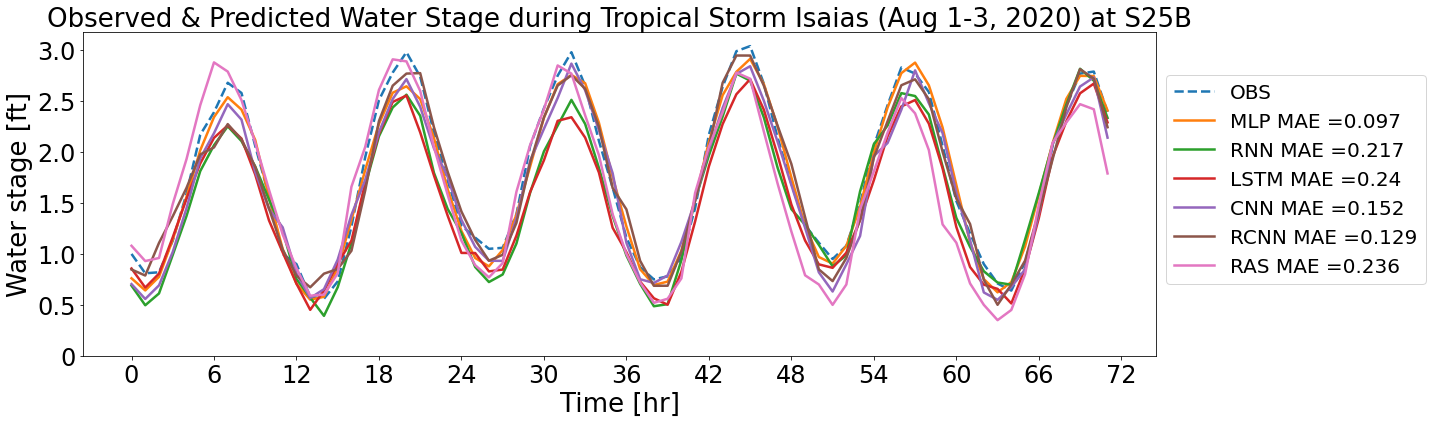

In [23]:
df_h2 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'Conv_MLP', 'Conv_RNN', 'RAS'])
df_h2.iloc[:, 0] = obs_h.iloc[:, 2]
df_h2.iloc[:, 1] = mlp_1920_h[:, 2]
df_h2.iloc[:, 2] = rnn_1920_h[:, 2]
df_h2.iloc[:, 3] = lstm_1920_h[:, 2]
df_h2.iloc[:, 4] = conv_mlp_1920_h[:, 2]
df_h2.iloc[:, 5] = conv_rnn_1920_h[:, 2]
df_h2.iloc[:, 6] = ras_h.iloc[:, 2]


plt.rcParams["figure.figsize"] = (20, 6)

LINEWIDTH = 2.5
plt.plot(df_h2.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_h2.iloc[:, 1].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 1])))))
plt.plot(df_h2.iloc[:, 2].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 2])))))
plt.plot(df_h2.iloc[:, 3].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 3])))))
plt.plot(df_h2.iloc[:, 4].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 4])))))
plt.plot(df_h2.iloc[:, 5].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 5])))))
plt.plot(df_h2.iloc[:, 6].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 73, step=6), [i for i in range(0, 73, 6)], fontsize=24)
plt.yticks(np.arange(0, 3.5, step=0.5), [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], fontsize=24)
plt.title('Observed & Predicted Water Stage during Tropical Storm Isaias (Aug 1-3, 2020) at S25B', fontsize=26)
plt.legend(fontsize=20, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-3.png', bbox_inches='tight', dpi=400)
plt.show()

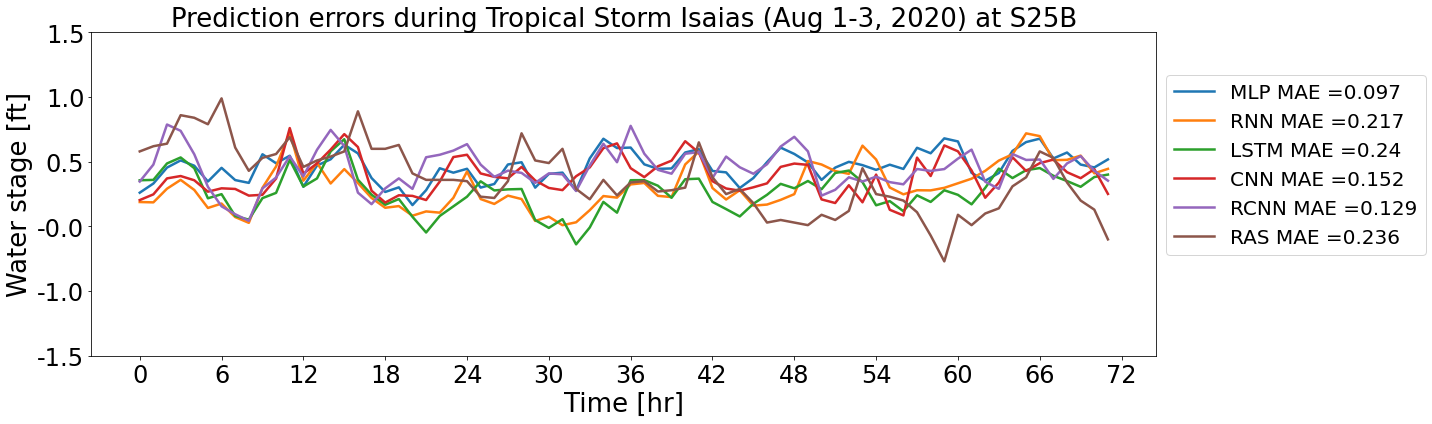

In [24]:
df_h2 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'Conv_MLP', 'Conv_RNN', 'RAS'])
df_h2.iloc[:, 0] = obs_h.iloc[:, 2]
df_h2.iloc[:, 1] = mlp_1920_h[:, 2]
df_h2.iloc[:, 2] = rnn_1920_h[:, 2]
df_h2.iloc[:, 3] = lstm_1920_h[:, 2]
df_h2.iloc[:, 4] = conv_mlp_1920_h[:, 2]
df_h2.iloc[:, 5] = conv_rnn_1920_h[:, 2]
df_h2.iloc[:, 6] = ras_h.iloc[:, 2]

plt.rcParams["figure.figsize"] = (20, 6)

LINEWIDTH = 2.5
# plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_h2.iloc[:, 1].values-df_h2.iloc[:, 0].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 1])))))
plt.plot(df_h2.iloc[:, 2].values-df_h2.iloc[:, 0].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 2])))))
plt.plot(df_h2.iloc[:, 3].values-df_h2.iloc[:, 0].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 3])))))
plt.plot(df_h2.iloc[:, 4].values-df_h2.iloc[:, 0].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 4])))))
plt.plot(df_h2.iloc[:, 5].values-df_h2.iloc[:, 0].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 5])))))
plt.plot(df_h2.iloc[:, 6].values-df_h2.iloc[:, 0].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_h2.iloc[:, 0], df_h2.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 73, step=6), [i for i in range(0, 73, 6)], fontsize=24)
plt.yticks(np.arange(-1.5, 1.5, step=0.5), [-1.5, -1.0, -0.0, 0.5, 1.0, 1.5], fontsize=24)
plt.title('Prediction errors during Tropical Storm Isaias (Aug 1-3, 2020) at S25B', fontsize=26)
# plt.ylim(-1.5, 1.5)
plt.legend(fontsize=20, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-3-diff.png', bbox_inches='tight', dpi=300)
plt.show()

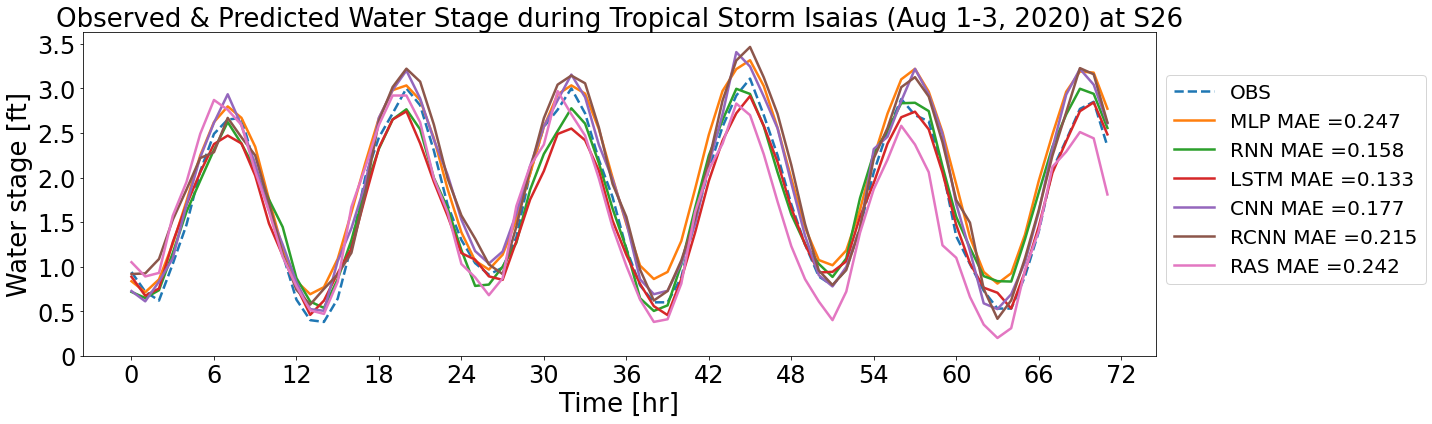

In [25]:
df_h3 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'CNN', 'CRNN', 'RAS'])
df_h3.iloc[:, 0] = obs_h.iloc[:, 3]
df_h3.iloc[:, 1] = mlp_1920_h[:, 3]
df_h3.iloc[:, 2] = rnn_1920_h[:, 3]
df_h3.iloc[:, 3] = lstm_1920_h[:, 3]
df_h3.iloc[:, 4] = conv_mlp_1920_h[:, 3]
df_h3.iloc[:, 5] = conv_rnn_1920_h[:, 3]
df_h3.iloc[:, 6] = ras_h.iloc[:, 3]


plt.rcParams["figure.figsize"] = (20, 6)

LINEWIDTH = 2.5
plt.plot(df_h3.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_h3.iloc[:, 1].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 1])))))
plt.plot(df_h3.iloc[:, 2].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 2])))))
plt.plot(df_h3.iloc[:, 3].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 3])))))
plt.plot(df_h3.iloc[:, 4].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 4])))))
plt.plot(df_h3.iloc[:, 5].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 5])))))
plt.plot(df_h3.iloc[:, 6].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 73, step=6), [i for i in range(0, 73, 6)], fontsize=24)
plt.yticks(np.arange(0, 4.0, step=0.5), [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], fontsize=24)
plt.title('Observed & Predicted Water Stage during Tropical Storm Isaias (Aug 1-3, 2020) at S26', fontsize=26)
plt.legend(fontsize=20, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-4.png', bbox_inches='tight', dpi=400)
plt.show()

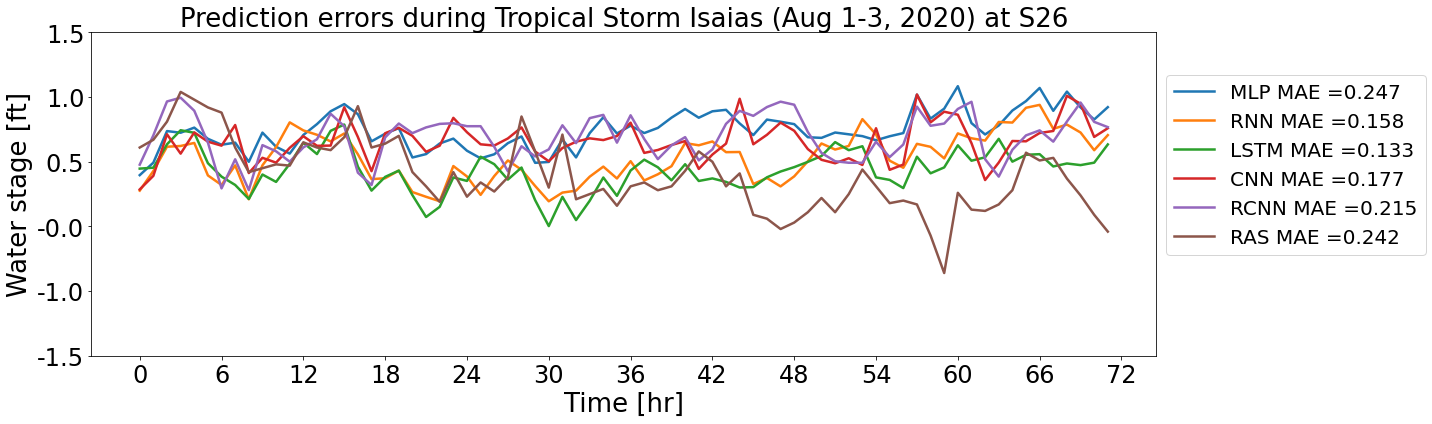

In [26]:
df_h3 = pd.DataFrame(columns = ['OBS', 'MLP', 'RNN', 'LSTM', 'Conv_MLP', 'Conv_RNN', 'RAS'])
df_h3.iloc[:, 0] = obs_h.iloc[:, 3]
df_h3.iloc[:, 1] = mlp_1920_h[:, 3]
df_h3.iloc[:, 2] = rnn_1920_h[:, 3]
df_h3.iloc[:, 3] = lstm_1920_h[:, 3]
df_h3.iloc[:, 4] = conv_mlp_1920_h[:, 3]
df_h3.iloc[:, 5] = conv_rnn_1920_h[:, 3]
df_h3.iloc[:, 6] = ras_h.iloc[:, 3]

plt.rcParams["figure.figsize"] = (20, 6)

LINEWIDTH = 2.5
# plt.plot(df_h.iloc[:, 0].values, linestyle='--', linewidth=LINEWIDTH, label='OBS')
plt.plot(df_h3.iloc[:, 1].values-df_h3.iloc[:, 0].values, linewidth=LINEWIDTH, label='MLP MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 1])))))
plt.plot(df_h3.iloc[:, 2].values-df_h3.iloc[:, 0].values, linewidth=LINEWIDTH, label='RNN MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 2])))))
plt.plot(df_h3.iloc[:, 3].values-df_h3.iloc[:, 0].values, linewidth=LINEWIDTH, label='LSTM MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 3])))))
plt.plot(df_h3.iloc[:, 4].values-df_h3.iloc[:, 0].values, linewidth=LINEWIDTH, label='CNN MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 4])))))
plt.plot(df_h3.iloc[:, 5].values-df_h3.iloc[:, 0].values, linewidth=LINEWIDTH, label='RCNN MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 5])))))
plt.plot(df_h3.iloc[:, 6].values-df_h3.iloc[:, 0].values, linewidth=LINEWIDTH, label='RAS MAE ={}'.format(float("{:.3f}".format(mae(df_h3.iloc[:, 0], df_h3.iloc[:, 6])))))

plt.tick_params(axis='both', which='both', bottom='on', left='on', labelbottom='on', labelleft='on')

plt.xlabel('Time [hr]', fontsize=26)
plt.ylabel('Water stage [ft]', fontsize=26)
plt.xticks(np.arange(0, 73, step=6), [i for i in range(0, 73, 6)], fontsize=24)
plt.yticks(np.arange(-1.5, 1.5, step=0.5), [-1.5, -1.0, -0.0, 0.5, 1.0, 1.5], fontsize=24)
plt.title('Prediction errors during Tropical Storm Isaias (Aug 1-3, 2020) at S26', fontsize=26)
# plt.ylim(-1.5, 1.5)
plt.legend(fontsize=20, bbox_to_anchor=(1.0, 0.9))
# plt.grid()
# plt.savefig('../figures/9-4-diff.png', bbox_inches='tight', dpi=300)
plt.show()